Sona Davis
# Tutorial 1.2: SDSS database
### homeworks- continuation
 Introduction to Active Galactic Nuclei

In [6]:
 #importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#reading the csv file
# data set of galaxies downloaded from SDSS by using SQL query
import csv

#### (a) Select galaxies and quasars with redshifts between $0.05$ and $0.3$ and signal-to-noise ratios greater than $35$ near $\text{H}\beta$ line. 

#### Ensure that lines $\text{[OIII] }\lambda 5007$,  $\text{H}\beta$ $\lambda 4863$ and $\text{H}\gamma$ $\lambda 4341$ are present in emission and that the FWHM of $\text{H}\beta$ is greater than $\text{1000 km/s}$.

#### For each selected spectrum, find the flux ratios of $\text{[OIII] }/\text{ H}\beta$, $\text{ H}\beta\text{ }/\text{ H}\gamma$, and $\text{[OIII] }/\text{ H}\gamma$, as well as the equivalent width and flux of $\text{H}\beta$, redshift, and extinction correction: $\text{E(B-V)}$ of type SFD (tip: the last one find in galSpecInfo table).

In [9]:
datahwa= pd.read_csv("/home/user/Documents/AGN/T1/T1 hw a.csv")
datahwa

#Table1
plate mjd   fiberid z          ra        dec         h_beta_flux h_beta_eqw oiii_5007_flux h_gamma_flux ratio_oiii_hbeta ratio_hbeta_hgamma ratio_oiii_hgamma approx_ebv_sfd    fwhm_hbeta_kms
299   51671 310     0.271596   204.1469  -0.35177838 131.986     -13.08857  85.82951       62.58635     0.6502926        2.108862           1.371377          0.02304087      1177.41002251547
300   51943 272     0.2447907  206.24771 -0.26653267 993.4495    -26.27094  1756.561       435.3727     1.768143         2.281837           4.034614          0.02211701      1177.41002251547
            309     0.07327056 205.96278 0.076331759 604.6573    -11.43364  676.2073       293.9839     1.118331         2.05677            2.30015           0.0230437       1177.41002251547
299   51671 549     0.08696799 206.22046 0.088969194 671.4836    -16.11777  354.6841       342.2238     0.5282096        1.962118           1.03641           0.02271245      1177.41002251547
...                                                                                                                                                                                        ...
2774  54534 430     0.1098744  216.85438 19.831181   1842.363    -5.147871  1613.432       1516.804     0.8757405        1.214635           1.063705          0.02830321      1177.41002251547
2656  54484 158     0.193608   182.26037 25.004332   236.8488    -15.09155  199.0146       106.521      0.84026          2.223495           1.868314          0.02302065      1177.41002251547
2522  54570 488     0.2879085  239.73062 12.932027   287.4504    -10.11995  198.8914       138.961      0.6919155        2.068569           1.431275          0.0356736       1177.41002251547
2641  54230 260     0.2051404  202.82593 17.738178   399.8068    -40.52969  367.9317       164.2463     0.9202738        2.43419            2.240121          0.01740838      1177.41002251547
668   52162 190     0.2912982  34.282816 -8.7953924  591.8996    -10.67035  180.5084       362.4025     0.3049645        1.633266           0.4980882         0.02374043      1177.41002251547

[2256 rows x 1 columns]

#### (b) How many objects have you found? Which one from the conditions in WHERE is narrowing the results most severely? 
#### *(TIP: one needs to play with this for a while...)*

#### (c) Find put if there is some of the subclass AGN objects with the same conditions under (a). Adopt your code to get result.

#### (d) Modify your solution under (a) to include objects with redshift between 0.05 and 0.6. Using this modified solution and the list of objects (287-plate-MJD-fiber.txt) submit the SQL query via CrossID. 
#### *(TIP: you will need to alter the SQL code prepared under (a) to fit requirements of CrossID. Follow the comments you get and be patient)*

#### (e) Check the spectra of found objects, download some of them using wget.

#### (f) BONUS: read download fits files and plot the spectra using Python.

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
spectra = fits.open('spectra/spec-0268-51633-0235.fits')
spectra.info()

Filename: spectra/spec-0268-51633-0235.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     139   ()      
  1  COADD         1 BinTableHDU     26   3832R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   


In [3]:
# spectral data
spectra_data = spectra[1].data
# header
hd = spectra[2].data

In [4]:
spectra_data.columns

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)

In [ ]:
hd.columns

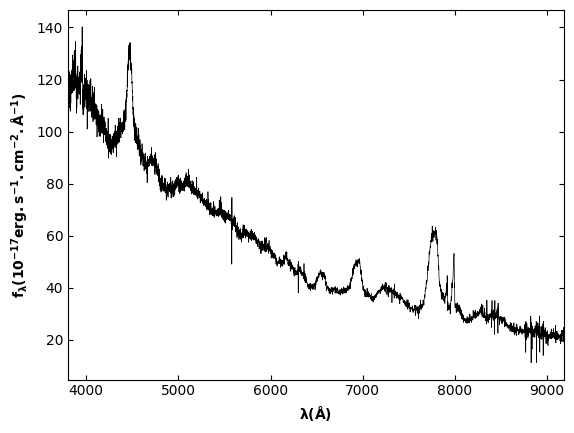

In [6]:
fig,ax=plt.subplots()
plt.plot(10**spectra_data['loglam'], spectra_data['flux'],color='black', linewidth = 0.5)

plt.xlim(hd['WAVEMIN'],hd['WAVEMAX'])
plt.xlabel(r'$\bf \lambda ({\AA})$')
plt.ylabel(r'$\bf f_\lambda (10^{-17} erg. s^{-1}.cm^{-2}.{\AA}^{-1})$')
ax.tick_params(direction="in",which='both',top=True,right=True)

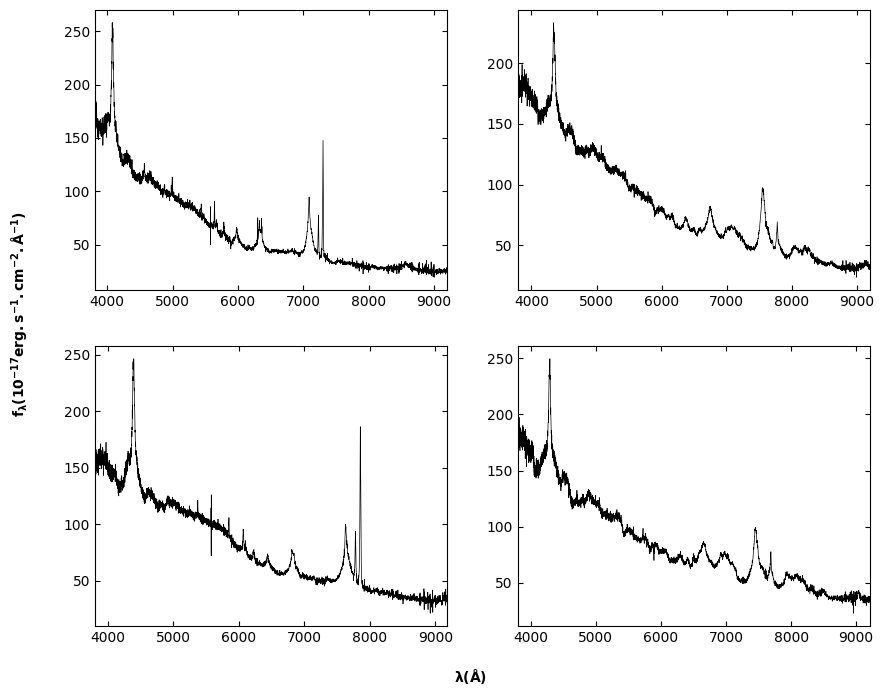

In [7]:
# plotting multiple spectra
files = ['spec-0329-52056-0577.fits', 'spec-0402-51793-0479.fits', 'spec-0408-51821-0611.fits', 'spec-0411-51817-0381.fits']
spec = [ fits.open('spectra/'+files[i]) for i in range(len(files)) ]
spec_data = [spec[i][1].data for i in range(len(files))]
hd = [spec[i][2].data for i in range(len(files))]

fig,ax =plt.subplots(2,2, figsize=(10,8))
n=0
for i in range(2):
    for j in range(2):
        ax[i,j].plot(10**spec_data[n]['loglam'], spec_data[n]['flux'],color='black', linewidth = 0.5)
        ax[i,j].tick_params(direction="in",which='both',top=True,right=True)
        ax[i,j].set_xlim(hd[n]['WAVEMIN'],hd[n]['WAVEMAX'])
        n+=1
     
fig.text(0.5, 0.04, r'$\bf \lambda ({\AA})$', ha='center')
fig.text(0.04, 0.5, r'$\bf f_\lambda (10^{-17} erg. s^{-1}.cm^{-2}.{\AA}^{-1})$', va='center', rotation='vertical')
plt.show()

___